Polecenie

1. Wejdż na (https://www.kaggle.com/c/titanic/overview) i zapoznaj się ze zbiorem danych dotyczących Tytanic’a.
2. Dokonaj EDA biorąc pod uwagę wskazówki oraz pytania dotyczące badań eksploracyjnych.
    - Czy wszystkie zmienne są potrzebne? Warto spojrzeć na korelację pomiędzy daną cechą, a docelową etykietą, np.: zaobserwować średnią przeżywalność w stosunku do klasy biletu: 
    df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()
    - Czy możemy z istniejącej cechy stworzyć inną (feature engineering)?
    - Co ze zmiennymi kategorycznymi? Czy wymagają konwersji?
    - Ile jest brakujących danych i co z nimi zrobić? Odrzucić kolumnę? Kilka wierszów? missingno.matrix(X_train, figsize=(30, 10)) Może warto na podstawie innych zmiennych z imputować wartości?
3. Naucz sieć neuronową przy użyciu wybranej biblioteki (np.: sklearn). 
4. Dokonaj predykcji. Zbiór testowy nie zawiera labeli stąd, aby poeksperymentować z modelem użyj techniki cross-validation.
5. Przetestuj różne parametry sieci neuronowej: liczbę warstw, liczbę neuronów w warstwach, funkcje aktywacji oraz algorytm optymalizacji.
6. Wynik zawrzyj w sprawozdaniu (dobry wynik: ~80% (można więcej?)


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
titanic = pd.read_csv("C:\\Users\\PC COMPUTER\\Desktop\\Metody uczenia maszynowego\\Laboratoria\\Lab4\\titanic.csv", header=0)

In [9]:

titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


***
***
# EDA


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


***
***
Ile jest brakujących danych?


In [11]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

***
***
Liczba osób, które przeżyły i zginęły z podziałem na płeć

In [12]:
titanic.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

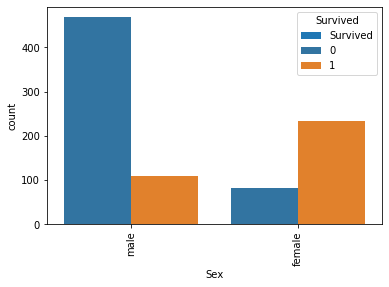

In [13]:
titanic[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
sns.countplot('Sex',hue='Survived',data=titanic,)
plt.show()

***
***
Liczba osób, które zginęły lub przeżyły z podziałem typ klasy biletu

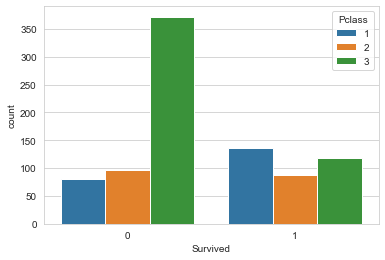

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic)

***
***
Z poniższego diagramu można wywnioskować, że najwięcej pasażerów było z przedziału wiekowego 20-30 lat

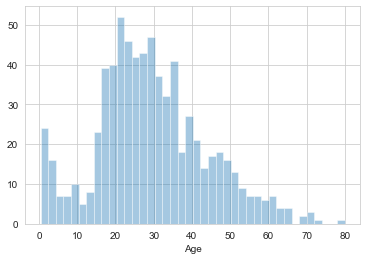

In [15]:
sns.distplot(titanic['Age'].dropna(), kde=False, bins=40)

***
***
Przeżywalność związana z klasę biletu

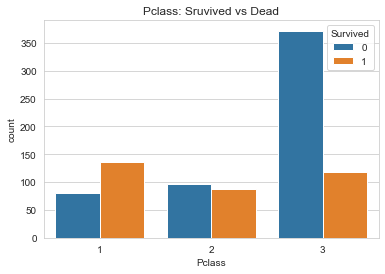

In [16]:
sns.countplot('Pclass', hue='Survived', data=titanic)
plt.title('Pclass: Sruvived vs Dead')
plt.show()

***
***
Z poniższego diagramu można zauważyć, że przeżywalność kobiet w klasie 1 była na poziomie 95=97%
Natomiast przeżywalność mężczyzn w tej samej klasie wynosi już około 37-38%

Zatem kobiety mają znacznie większą szansę na przeżycie ze względu, że są prioryzowane podczas akcji ratunkowej.

C:\Users\PC COMPUTER\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


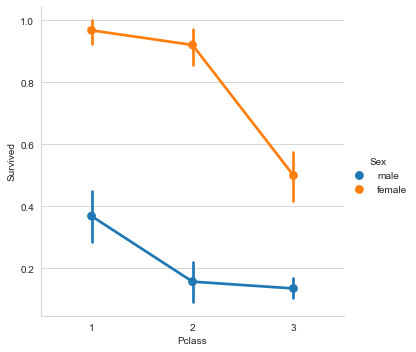

In [17]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=titanic)
plt.show()

***
***
Z poniższego diagramu możemy zaobserwować, że w 
- klasie 1 prioryzowani byli ludzie w przedziale wiekowym 40-60 lat
- klasie 2 prioryzowani byli ludzie w przedziale wiekowym 20-40 lat
- klasie 3 prioryzowani byli ludzie w przedziale wiekowym 20-30 lat

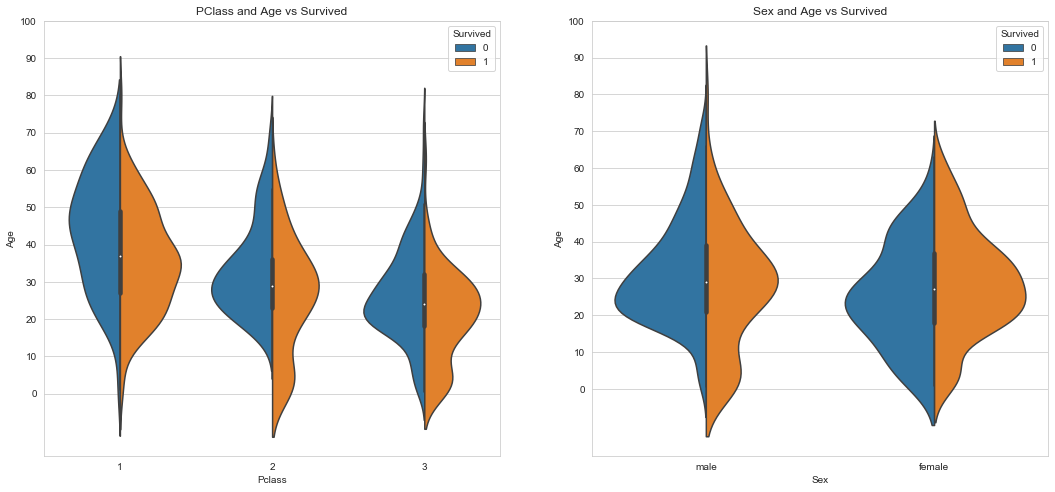

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=titanic,split=True,ax=ax[0])
ax[0].set_title('PClass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=titanic,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

***
***
Z poniższych diagramów możemy zaobserwować, że najwięcej zginęło osób w wieku 25 lat a przeżyło najwięcej w przedziale wiekowym 20-25

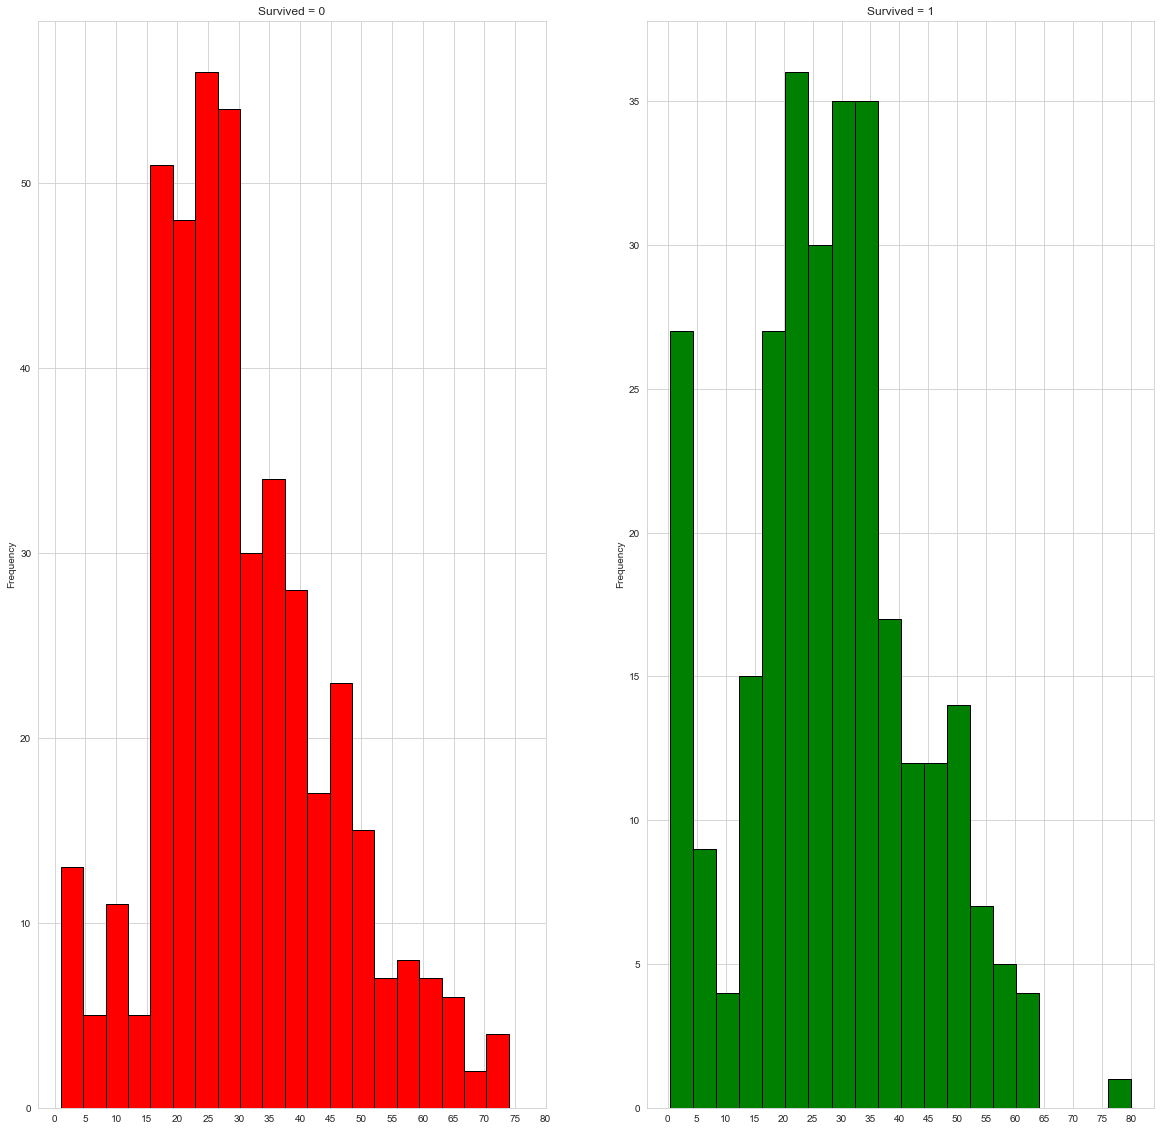

In [19]:
f,ax=plt.subplots(1,2,figsize=(20,20))
titanic[titanic['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
titanic[titanic['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
ax[1].set_title('Survived = 1')
plt.show()

***
***
Z poniższej tabeli możemy zauważyć, że posiadanie członków rodziny na statku przyczyniało się negatywnie na przeżywalność.
Rodziny powyżej 5 członków posiadały zerową przeżywalność.

In [20]:
pd.crosstab([titanic.SibSp],titanic.Survived).style.background_gradient('summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


***
***
Największą szansę na przeżycie posiadały osoby z jednym członkiem rodziny

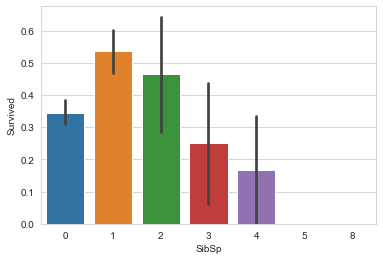

In [22]:
sns.barplot('SibSp','Survived', data=titanic)
plt.show()

***
***
Rodziny składające się z 4 członków i więcej znajdowały się w klasie 3

In [23]:
pd.crosstab(titanic.SibSp,titanic.Pclass).style.background_gradient('summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


***
***
# Deep learning

In [39]:
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

In [63]:
titanic = pd.read_csv("C:\\Users\\PC COMPUTER\\Desktop\\Metody uczenia maszynowego\\Laboratoria\\Lab4\\titanic.csv", 
                      header=0, 
                      usecols=['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived'])
titanic['Sex'] = titanic['Sex'].apply(lambda x: 0 if x=='female' else 1)
titanic['Embarked'] = titanic['Embarked'].apply(lambda x: 1 if x=='S' else 2 if x=='C' else 3)
# print(titanic)

# print(titanic['Ticket'].value_counts())
    
X = titanic.drop(['Survived'], axis=1)
Y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print(X_train)

     PassengerId  Pclass  Sex  SibSp  Parch     Fare  Embarked
114          115       3    0      0      0  14.4583         2
874          875       2    0      1      0  24.0000         2
76            77       3    1      0      0   7.8958         1
876          877       3    1      0      0   9.8458         1
674          675       2    1      0      0   0.0000         1
..           ...     ...  ...    ...    ...      ...       ...
715          716       3    1      0      0   7.6500         1
767          768       3    0      0      0   7.7500         3
72            73       2    1      0      0  73.5000         1
235          236       3    0      0      0   7.5500         1
37            38       3    1      0      0   8.0500         1

[623 rows x 7 columns]


In [64]:
clf = MLPClassifier(Solver='adam', random_state=1, max_iter=1000).fit(X_train, y_train)

In [65]:
clf.predict_proba(X_test)

array([[0.51852828, 0.48147172],
       [0.89236653, 0.10763347],
       [0.52334245, 0.47665755],
       [0.71364138, 0.28635862],
       [0.42136573, 0.57863427],
       [0.94778101, 0.05221899],
       [0.72777912, 0.27222088],
       [0.42165712, 0.57834288],
       [0.69737831, 0.30262169],
       [0.56376396, 0.43623604],
       [0.96193502, 0.03806498],
       [0.49806461, 0.50193539],
       [0.78234269, 0.21765731],
       [0.82388781, 0.17611219],
       [0.58179898, 0.41820102],
       [0.75265245, 0.24734755],
       [0.94227534, 0.05772466],
       [0.9509838 , 0.0490162 ],
       [0.88582452, 0.11417548],
       [0.64277179, 0.35722821],
       [0.91860407, 0.08139593],
       [0.86524636, 0.13475364],
       [0.25119391, 0.74880609],
       [0.5821773 , 0.4178227 ],
       [0.60004076, 0.39995924],
       [0.96198068, 0.03801932],
       [0.17505198, 0.82494802],
       [0.76961082, 0.23038918],
       [0.92091632, 0.07908368],
       [0.06327949, 0.93672051],
       [0.

In [66]:
clf.score(X_test, y_test)

0.7052238805970149

Prezycja predykcji wyniosła około ~70% zobaczmy co możemy zrobić
***

In [67]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [69]:
from sklearn.model_selection import GridSearchCV

gridCV = GridSearchCV(clf, parameter_space, n_jobs=-1, cv=3)
gridCV.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=1000,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alph

In [70]:
# Best paramete set
print('Best parameters found:\n', gridCV.best_params_)

# All results
means = gridCV.cv_results_['mean_test_score']
stds = gridCV.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gridCV.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
0.631 (+/-0.022) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.652 (+/-0.083) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.629 (+/-0.026) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.652 (+/-0.083) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.637 (+/-0.004) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.684 (+/-0.107) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'

In [71]:
y_true, y_pred = y_test , gridCV.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.67      0.96      0.79       153
           1       0.88      0.37      0.52       115

    accuracy                           0.71       268
   macro avg       0.77      0.67      0.66       268
weighted avg       0.76      0.71      0.68       268



Udało się podbić precyzję do 88% co według polecenia można uznać, za dobry wynik
***